In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import re 

In [16]:
#the functions simplifies the event text so it gives a generic description of the event 
def clean_event(df):
    # a list that will be used store the simplified event values 
    event_list = []
    for i in range(len(df)):
        event_text = df.loc[i, "EVENT_TX"]
        #only takes the value before any special character 
        cleaned = re.split(r'[^a-zA-Z0-9\s]', event_text)[0]
        event_list.append(cleaned)
    df['event'] = event_list

In [17]:
#the function creates a dataframe that only contains rows were the event was an out
def find_outs(df):
    not_out = []
    for i in range(len(df)):
        event = df.loc[i, "event"]
        #all of the following characters correspond to an event that was not an out such as a hit or walk
        if "S" in event:
            not_out.append(event)
        elif "D" in event: 
            not_out.append(event)
        elif "T" in event: 
            not_out.append(event)
        elif "H" in event:
            not_out.append(event)
        elif "W" in event: 
            not_out.append(event)
        elif "E" in event:
            not_out.append(event)
        elif "PB" in event: 
            not_out.append(event)
    return not_out 

In [18]:
#the function uses the two previously defined functions and produces a bar graph of the out distribution
def out_distribution(file, name):
    #imports the csv file from MySQL into a dataframe 
    data = pd.read_csv(file)
    #creates a new attribute in the dataframe with the generic event description 
    clean_event(data)
    #creates a list of the possible events that are not outs 
    on_base = find_outs(data)
    #creates a new dataframe containing only tuples where the event is an out 
    data2 = data[~data['event'].isin(on_base)]
    #creates a new dataframe with each out and its number of occurences 
    count = data2['event'].value_counts().to_frame().reset_index()
    #renaming the columns 
    count.columns = ['out', 'count']
    #finding the total number of outs produces 
    total = count['count'].sum()
    #create an new column that has the percentages for each out 
    count['percent'] = count['count']/total
    #create a new dataframe that only contains the outs the occured more than 0.5% of the time 
    data3 = count.loc[count["percent"] > 0.005]
    
    #creating the bar graph 
    plt.figure(figsize=(15,4))
    plt.bar(data3['out'], data3['percent'])
    plt.title(name + ' - Out Distribution')
    plt.xlabel('Type of Out')
    plt.ylabel('Percentage of Outs')
    plt.show()

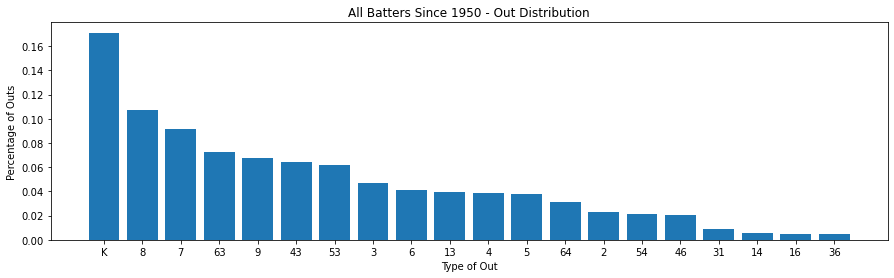

In [19]:
out_distribution('allouts.csv', 'All Batters Since 1950')

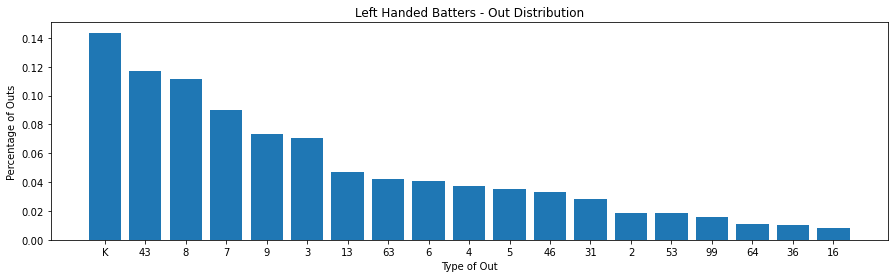

In [20]:
out_distribution('lefthand.csv', 'Left Handed Batters')

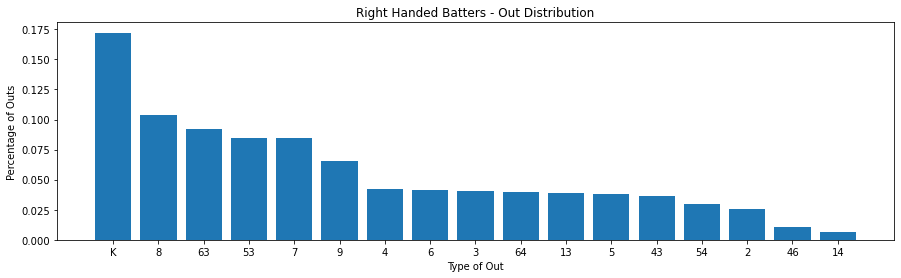

In [21]:
out_distribution('righthand.csv', 'Right Handed Batters')

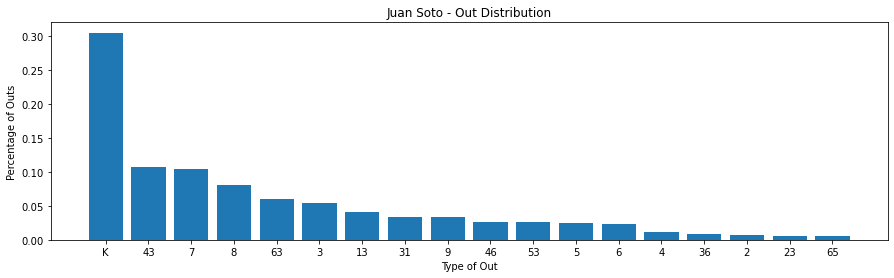

In [22]:
out_distribution('soto.csv', 'Juan Soto')

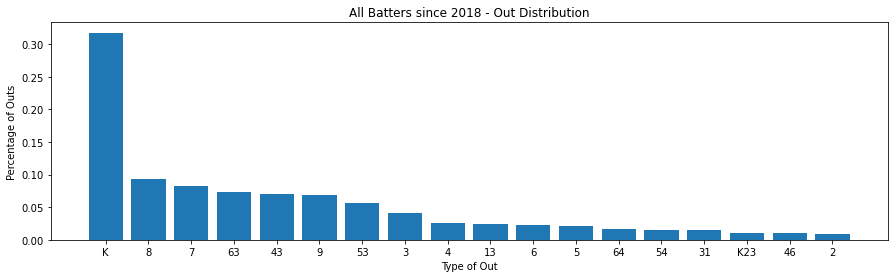

In [23]:
out_distribution('since2018.csv', 'All Batters since 2018')

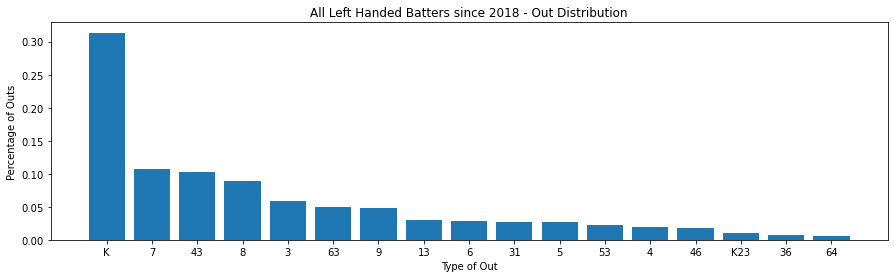

In [24]:
out_distribution('since2018_lefthand.csv', 'All Left Handed Batters since 2018')

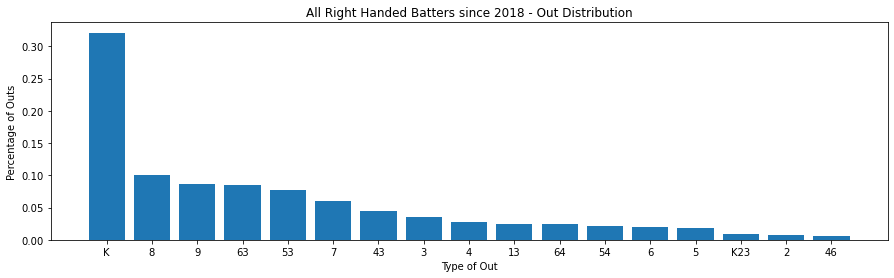

In [25]:
out_distribution('since2018_righthand.csv', 'All Right Handed Batters since 2018')